# Series of Plots to Analyze Long Ariane Timeseries: Backward South

In [78]:
import arrow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.colorbar as mcb
from matplotlib.patches import Ellipse
import netCDF4 as nc
import numpy as np
import os
import pandas as pd

from salishsea_tools import viz_tools

%matplotlib inline

SUBDIR_TMPL = '{:%d%b%y}'
results_dir = '/ocean/sallen/allen/research/MEOPAR/Ariane/BackFluxesSouth/StatsFiles/'
other_nan = ['********************']

In [79]:
startdate = []
runlength = []
startdate.append('2015-04-01')
runlength.append(365-31)
#startdate.append('2015-09-01')
#runlength.append(3)
#startdate.append('2016-01-01')
#runlength.append(31+29+3)
NUM = 365-31

## Read the Results

In [80]:
rawstats = ['sn', 's0max', 's0min', 's0x', 's0x2', 's1max', 's1min', 's1x', 's1x2']
stat = {}
VictoriaSill = pd.DataFrame(data=None, index=None, 
                           columns=['date', 'latitude-mean', 'latitude-std', 'depth-mean', 'depth-stdev',
                                   'salinity-mean', 'salinity-std', 'age-mean', 'age-stdev', 'flux'],
                           dtype=None, copy=False)
VictoriaSillIn = pd.DataFrame(data=None, index=None, 
                           columns=['date', 'latitude-mean', 'latitude-std', 'depth-mean', 'depth-stdev',
                                   'salinity-mean', 'salinity-std'],
                           dtype=None, copy=False)
Lost = pd.DataFrame(data=None, index=None,
                   columns=['date', 'flux'],
                   dtype=None, copy=False)
PugetSound= pd.DataFrame(data=None, index=None,
                   columns=['date', 'flux'],
                   dtype=None, copy=False)
thedays = []
mean = np.zeros((5))
stdev = np.zeros((4))

In [81]:
line = 0
for segment in range(len(startdate)):
    startrundate = arrow.get(startdate[segment], 'YYYY-MM-DD')
    for nday in range(runlength[segment]):
        rundate = startrundate.replace(days=+nday)
        for stattype in rawstats:
            stat[stattype] = pd.read_csv(os.path.join(results_dir,
                                        stattype+'.'+SUBDIR_TMPL.format(rundate.datetime).lower()), 
                                        index_col=0, na_values=other_nan)
            stat[stattype].index = [x.strip() for x in stat[stattype].index]
        for i, parameter in enumerate(['depth', 'latitude', 'sal', 'age']):
            themean = stat['s1x'][parameter]/stat['sn']['sn']
            thestdev = np.sqrt(np.abs((stat['s1x2'][parameter] - 
                                     stat['s1x'][parameter]**2 / stat['sn']['sn'])
                                    / (stat['sn']['sn']-1)))
            mean[i] = themean.VictoriaSill
            stdev[i] = thestdev.VictoriaSill
        mean[4] = stat['sn']['flux'].VictoriaSill
        lost = (stat['sn']['flux'].total - stat['sn']['flux'].meanders - mean[4] 
                - stat['sn']['flux'].PugetSound - stat['sn']['flux'].Porlier - stat['sn']['flux'].Discovery)
#        print (stat['sn']['flux'].total, stat['sn']['flux'].meanders, mean[4],
#                stat['sn']['flux'].PugetSound, stat['sn']['flux'].Porlier, stat['sn']['flux'].Discovery)
        VictoriaSill.loc[line] = [rundate, mean[1], stdev[1], mean[0], stdev[0], 
                                 mean[2], stdev[2], mean[3], stdev[3], mean[4]]
        Lost.loc[line] = [rundate, lost]
        PugetSound.loc[line] = [rundate, stat['sn']['flux'].Discovery]
        for i, parameter in enumerate(['depth', 'latitude', 'sal']):
            themean = stat['s0x'][parameter]/stat['sn']['sn']
            thestdev = np.sqrt(np.abs((stat['s0x2'][parameter] - 
                                     stat['s0x'][parameter]**2 / stat['sn']['sn'])
                                    / (stat['sn']['sn']-1)))
            mean[i] = themean.VictoriaSill
            stdev[i] = thestdev.VictoriaSill
        VictoriaSillIn.loc[line] = [rundate, mean[1], stdev[1], mean[0], stdev[0], mean[2], stdev[2]]
        line = line + 1
VictoriaSill = VictoriaSill.set_index('date')
VictoriaSillIn = VictoriaSillIn.set_index('date')
Lost = Lost.set_index('date')
PugetSound = PugetSound.set_index('date')

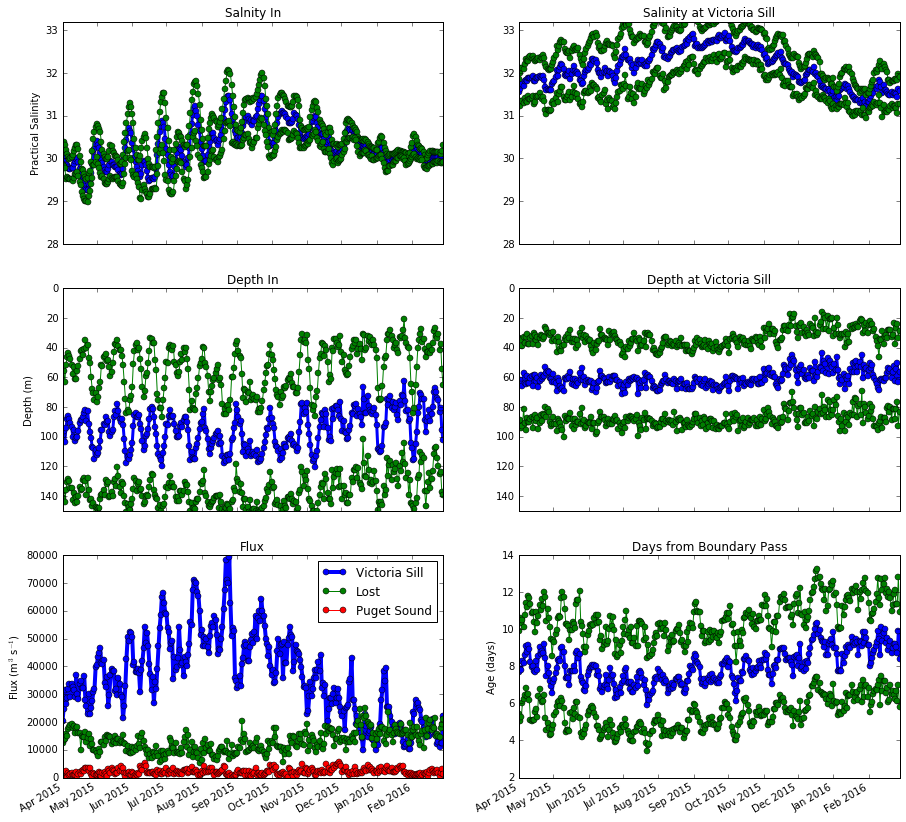

In [82]:
times = np.array([VictoriaSill.index[i].datetime for i in range(NUM)])
dmax=150; dmin=0
vmax=33.2; vmin=28
fig, ax = plt.subplots(3,2, figsize=(15,15))
ax[0,0].plot_date(times, VictoriaSillIn['salinity-mean'],'-o', linewidth=3)
ax[0,0].plot_date(times, VictoriaSillIn['salinity-mean']+VictoriaSillIn['salinity-std'],'g-o')
ax[0,0].plot_date(times, VictoriaSillIn['salinity-mean']-VictoriaSillIn['salinity-std'],'g-o')
ax[0,0].set_title('Salnity In')
ax[0,0].set_ylim(vmin, vmax)
ax[0,0].set_ylabel('Practical Salinity')
ax[0,1].plot_date(times, VictoriaSill['salinity-mean'], '-o', linewidth=3)
ax[0,1].plot_date(times, VictoriaSill['salinity-mean']+VictoriaSill['salinity-std'], 'g-o')
ax[0,1].plot_date(times, VictoriaSill['salinity-mean']-VictoriaSill['salinity-std'], 'g-o')
ax[0,1].set_title('Salinity at Victoria Sill')
ax[0,1].set_ylim(vmin, vmax)
ax[1,0].plot_date(times, VictoriaSillIn['depth-mean'], '-o', linewidth=3)
ax[1,0].plot_date(times, VictoriaSillIn['depth-mean']+VictoriaSillIn['depth-stdev'], 'g-o')
ax[1,0].plot_date(times, VictoriaSillIn['depth-mean']-VictoriaSillIn['depth-stdev'], 'g-o')
ax[1,0].set_title('Depth In')
ax[1,0].set_ylim(dmax, dmin)
ax[1,0].set_ylabel('Depth (m)')
ax[1,1].plot_date(times, VictoriaSill['depth-mean'],'-o', linewidth=3)
ax[1,1].plot_date(times, VictoriaSill['depth-mean']+VictoriaSill['depth-stdev'], 'g-o')
ax[1,1].plot_date(times, VictoriaSill['depth-mean']-VictoriaSill['depth-stdev'], 'g-o')
ax[1,1].set_title('Depth at Victoria Sill')
ax[1,1].set_ylim(dmax, dmin)
ax[2,0].plot_date(times, VictoriaSill['flux'],'-o', linewidth=4, label='Victoria Sill')
ax[2,0].plot_date(times, Lost['flux'], '-o', label='Lost')
ax[2,0].plot_date(times, PugetSound['flux'], '-o', label='Puget Sound')
ax[2,0].legend()
ax[2,0].set_title('Flux')
ax[2,0].set_ylabel('Flux (m$^3$ s$^{-1}$)')
ax[2,1].plot_date(times, VictoriaSill['age-mean']*15, '-o', linewidth=3)
ax[2,1].plot_date(times, (VictoriaSill['age-mean']+VictoriaSill['age-stdev'])*15, 'g-o')
ax[2,1].plot_date(times, (VictoriaSill['age-mean']-VictoriaSill['age-stdev'])*15, 'g-o')
ax[2,1].set_title('Days from Boundary Pass')
ax[2,1].set_ylabel('Age (days)')
fig.autofmt_xdate()

In [83]:
bathy = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
depths_raw = bathy.variables['Bathymetry'][:]
lons = bathy.variables['nav_lon'][:]
lats = bathy.variables['nav_lat'][:]
depths = depths_raw.filled(fill_value=0)

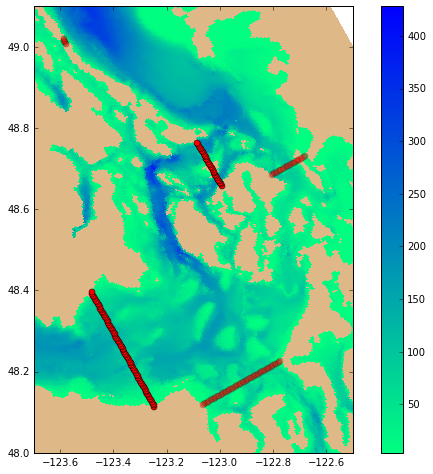

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
aspect = viz_tools.set_aspect(ax, coords='map', lats=lats)
cmap = plt.get_cmap('winter_r')
cmap.set_bad('burlywood')
mesh = ax.pcolormesh(lons[:], lats[:], depths_raw[:], cmap=cmap)
cbar = fig.colorbar(mesh)
plt.axis((-123.7, -122.5, 48., 49.1))
ax.plot(lons[320-1:348-1,283-1], lats[320-1:348-1,283-1], 'or')
ax.plot(lons[312-1,314-1:339-1], lats[312-1,314-1:339-1], 'or', alpha=0.3)
ax.plot(lons[429-1:433-1,241-1], lats[429-1:433-1, 241-1], 'or', alpha=0.5)  
ax.plot(lons[221-1, 206-1: 263-1], lats[221-1, 206-1:263-1], 'or', alpha=0.3)
ax.plot(lons[233-1:305-1, 179-1], lats[233-1:305-1, 179-1], 'or')

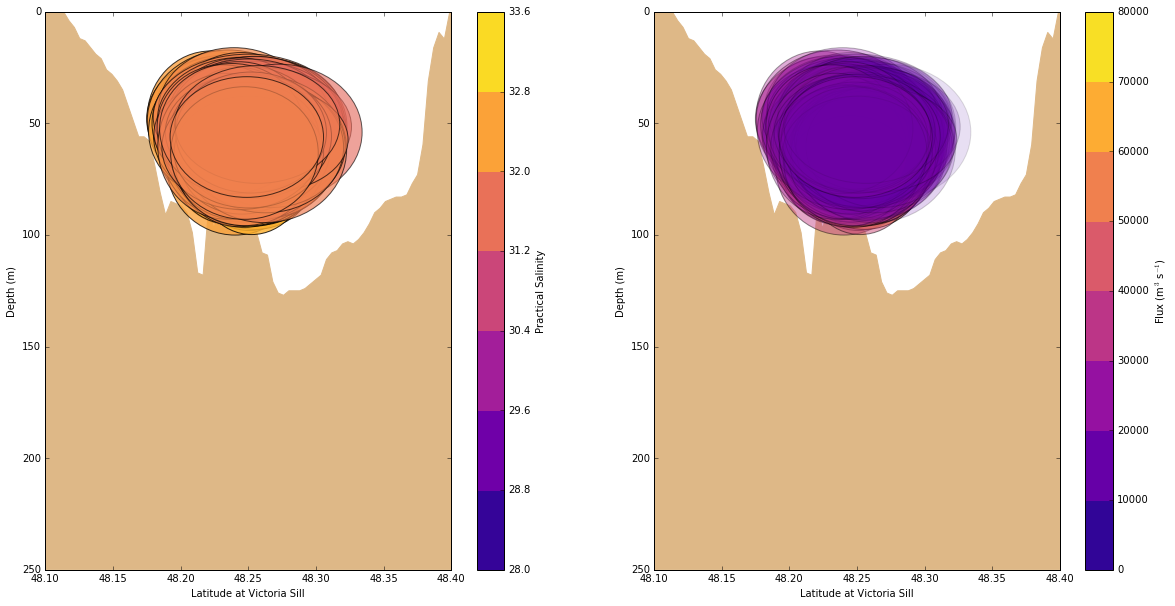

In [85]:
xlims = (48.1, 48.4)
depthmax = 250
emin = 0.; emax=8e4

cNorm = colors.Normalize(vmin=vmin, vmax=vmax)
eNorm = colors.Normalize(vmin=emin, vmax=emax)
cmap = 'plasma'
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cmap)
eMap = cmx.ScalarMappable(norm=eNorm, cmap=cmap)
Z = [[vmin,vmin],[vmax,vmax]]
strick = plt.contourf(Z, cmap=cmap)
plt.clf()
Z = [[emin,emin],[emax,emax]]
etrick = plt.contourf(Z, cmap=cmap)
plt.clf()


fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].fill_between(lats[:,179-1], depthmax, depths[:,179-1], color='burlywood')
ax[1].fill_between(lats[:,179-1], depthmax, depths[:,179-1], color='burlywood')

ells = [Ellipse(xy=(VictoriaSill['latitude-mean'][i], VictoriaSill['depth-mean'][i]), 
                    width=2*VictoriaSill['latitude-std'][i],
                    height=2*VictoriaSill['depth-stdev'][i], 
                alpha=(VictoriaSill['salinity-mean'][i]-vmin)/(vmax-vmin),
                facecolor=scalarMap.to_rgba(VictoriaSill['salinity-mean'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[0].add_artist(e)
    

ells = [Ellipse(xy=(VictoriaSill['latitude-mean'][i], VictoriaSill['depth-mean'][i]), 
                    width=2*VictoriaSill['latitude-std'][i],
                    height=2*VictoriaSill['depth-stdev'][i], 
                alpha=(VictoriaSill['flux'][i]-emin)/(emax-emin),
                facecolor=eMap.to_rgba(VictoriaSill['flux'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[1].add_artist(e)

    
ax[0].set_ylim((0, 250))
ax[0].set_xlim(xlims)
ax[0].invert_yaxis()
fig.colorbar(strick, ax=ax[0], label='Practical Salinity')

ax[1].set_ylim((0, 250))
ax[1].set_xlim(xlims)
ax[1].invert_yaxis()
fig.colorbar(etrick, ax=ax[1], label='Flux (m$^3$ s$^{-1}$)')

for ax in [ax[0], ax[1]]:
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Latitude at Victoria Sill')

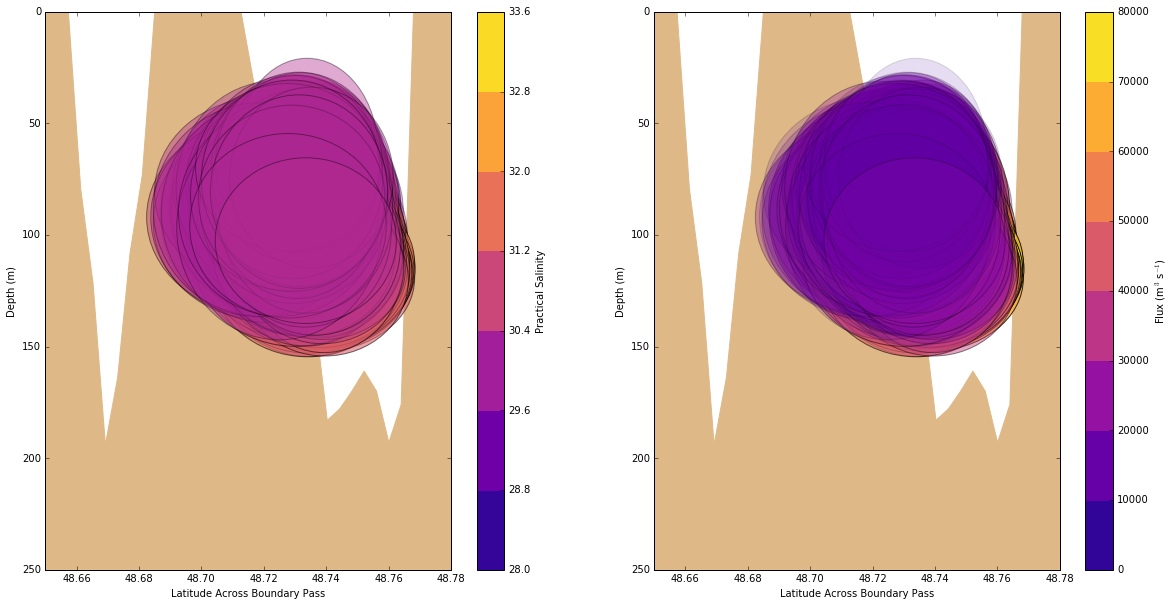

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
xlims = (48.65, 48.78)
depthmax = 250
ax[0].fill_between(lats[:,283-1], depthmax, depths[:,283-1], color='burlywood')
ax[1].fill_between(lats[:,283-1], depthmax, depths[:,283-1], color='burlywood')


ells = [Ellipse(xy=(VictoriaSillIn['latitude-mean'][i], VictoriaSillIn['depth-mean'][i]), 
                    width=2*VictoriaSillIn['latitude-std'][i],
                    height=2*VictoriaSillIn['depth-stdev'][i],
                alpha=(VictoriaSillIn['salinity-mean'][i]-vmin)/(vmax-vmin),
                facecolor = scalarMap.to_rgba(VictoriaSillIn['salinity-mean'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[0].add_artist(e)
    
ells = [Ellipse(xy=(VictoriaSillIn['latitude-mean'][i], VictoriaSillIn['depth-mean'][i]), 
                    width=2*VictoriaSillIn['latitude-std'][i],
                    height=2*VictoriaSillIn['depth-stdev'][i], 
                alpha=(VictoriaSill['flux'][i]-emin)/(emax-emin),
                facecolor=eMap.to_rgba(VictoriaSill['flux'][i])
)
        for i in range(NUM)]
for e in ells:
    ax[1].add_artist(e)

    
ax[0].set_ylim((0, 250))
ax[0].set_xlim(xlims)
ax[0].invert_yaxis()
fig.colorbar(strick, ax=ax[0], label='Practical Salinity')

ax[1].set_ylim((0, 250))
ax[1].set_xlim(xlims)
ax[1].invert_yaxis()
fig.colorbar(etrick, ax=ax[1], label='Flux (m$^3$ s$^{-1}$)')

for ax in [ax[0], ax[1]]:
    ax.set_ylabel('Depth (m)')
    ax.set_xlabel('Latitude Across Boundary Pass')

(0.0, 1.0, 0.0, 1.0)

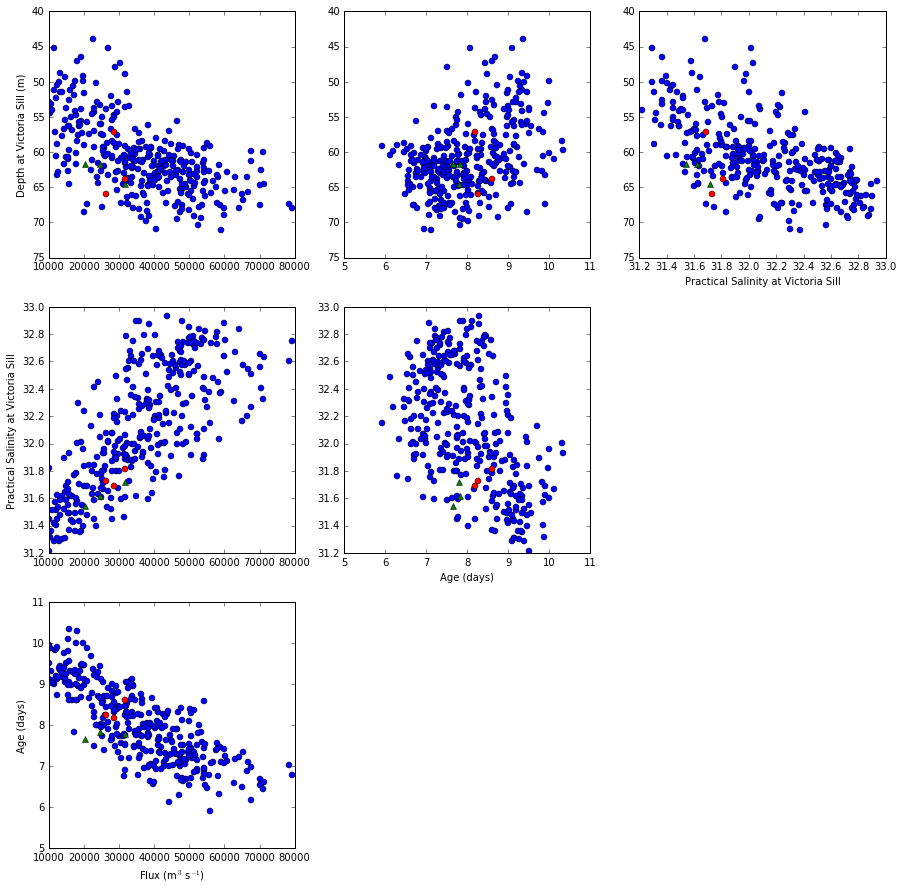

In [87]:
st=6; et=-1
fig, ax = plt.subplots(3, 3, figsize=(15,15))

ax[0,0].plot(VictoriaSill['flux'][st:et], VictoriaSill['depth-mean'][st:et], 'o')
ax[0,0].plot(VictoriaSill['flux'][:3], VictoriaSill['depth-mean'][:3], 'g^')
ax[0,0].plot(VictoriaSill['flux'][3:6], VictoriaSill['depth-mean'][3:6], 'ro')
ax[0,0].invert_yaxis()
ax[0,0].set_ylabel('Depth at Victoria Sill (m)')

ax[1,0].plot(VictoriaSill['flux'][st:et], VictoriaSill['salinity-mean'][st:et], 'o')
ax[1,0].plot(VictoriaSill['flux'][:3], VictoriaSill['salinity-mean'][:3], 'g^')
ax[1,0].plot(VictoriaSill['flux'][3:6], VictoriaSill['salinity-mean'][3:6], 'ro')
ax[2,0].set_xlabel('Flux (m$^3$ s$^{-1}$)')
ax[1,0].set_ylabel('Practical Salinity at Victoria Sill')

ax[0,1].plot(VictoriaSill['age-mean'][st:et]*15, VictoriaSill['depth-mean'][st:et], 'o')
ax[0,1].plot(VictoriaSill['age-mean'][:3]*15, VictoriaSill['depth-mean'][:3], 'g^')
ax[0,1].plot(VictoriaSill['age-mean'][3:6]*15, VictoriaSill['depth-mean'][3:6], 'ro')
ax[0,1].invert_yaxis()

ax[1,1].plot(VictoriaSill['age-mean'][st:et]*15, VictoriaSill['salinity-mean'][st:et], 'o')
ax[1,1].plot(VictoriaSill['age-mean'][:3]*15, VictoriaSill['salinity-mean'][:3], 'g^')
ax[1,1].plot(VictoriaSill['age-mean'][3:6]*15, VictoriaSill['salinity-mean'][3:6], 'ro')
ax[1,1].set_xlabel('Age (days)')

ax[0,2].plot(VictoriaSill['salinity-mean'][st:et], VictoriaSill['depth-mean'][st:et], 'o')
ax[0,2].plot(VictoriaSill['salinity-mean'][:3], VictoriaSill['depth-mean'][:3], 'g^')
ax[0,2].plot(VictoriaSill['salinity-mean'][3:6], VictoriaSill['depth-mean'][3:6], 'ro')
ax[0,2].set_xlabel('Practical Salinity at Victoria Sill')
ax[0,2].invert_yaxis()

ax[2,0].plot(VictoriaSill['flux'][st:et], VictoriaSill['age-mean'][st:et]*15, 'o')
ax[2,0].plot(VictoriaSill['flux'][:3], VictoriaSill['age-mean'][:3]*15, 'g^')
ax[2,0].plot(VictoriaSill['flux'][3:6], VictoriaSill['age-mean'][3:6]*15, 'ro')
ax[2,0].set_ylabel('Age (days)')


ax[1,2].axis('off')
ax[2,1].axis('off')
ax[2,2].axis('off')